In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [2]:
mnist_data = pd.read_csv('../datasets/mnist.csv')

In [3]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_data.shape

(42000, 785)

In [5]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
mnist_features = mnist_data[mnist_data.columns[1:]]

mnist_labels = mnist_data['label']

In [7]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
        
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  1


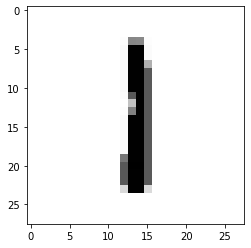

In [8]:
display_image(2)

Digit:  0


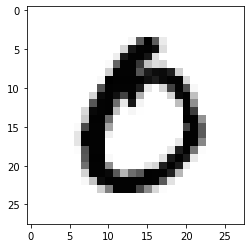

In [9]:
display_image(200)

In [10]:
mnist_features = np.asarray(mnist_features)

mnist_features.shape

(42000, 784)

In [11]:
mnist_features[10][150:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255,
       180,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [12]:
mnist_features = mnist_features/255.

In [13]:
mnist_features[10][150:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02745098, 0.09411765, 0.09411765, 0.38039216, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 1.        , 0.70588235,
       0.18823529, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(mnist_features,
                                                    mnist_labels, 
                                                    shuffle=True,
                                                    test_size=0.2)

In [15]:
logistic = linear_model.LogisticRegression(solver='lbfgs',
                                           max_iter=1000,
                                           multi_class='multinomial')

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C' : [0.1, 1, 5]}]

grid_search = GridSearchCV(logistic, param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1}

In [17]:
for i in range(3):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'C': 0.1}
Mean Test Score:  0.9143749999999999
Rank:  1
Parameters:  {'C': 1}
Mean Test Score:  0.9102380952380953
Rank:  2
Parameters:  {'C': 5}
Mean Test Score:  0.8999702380952381
Rank:  3


In [18]:
rbm = BernoulliRBM(verbose=True)

rbm_features_classifier = Pipeline(steps = [('rbm', rbm), 
                                            ('logistic', logistic)])

rbm.learning_rate = 0.06
logistic.C = grid_search.best_params_['C']

In [19]:
rbm_features_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [20]:
param_grid = [{'rbm__n_components' : [5, 50, 100, 150],
               'rbm__n_iter' : [5, 20]}]

grid_search = GridSearchCV(rbm_features_classifier, param_grid, cv=2)

grid_search.fit(x_train,y_train)

grid_search.best_params_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -194.78, time = 1.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -195.26, time = 1.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -198.48, time = 1.07s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -199.07, time = 1.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -199.69, time = 1.03s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -201.87, time = 1.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -195.28, time = 1.05s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -195.77, time = 1.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -200.57, time = 1.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -208.35, time = 1.03s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -195.42, time = 1.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -200.52, time = 1.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -198.42, time = 1.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.42, time = 1.07s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 8, pseudo-likelihood = -89.08, time = 3.97s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -88.28, time = 3.95s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -89.75, time = 4.13s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -90.87, time = 4.25s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -82.58, time = 4.15s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -86.33, time = 3.89s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -85.81, time = 3.97s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -87.87, time = 3.83s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -84.47, time = 3.89s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -86.34, time = 3.85s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -82.48, time = 3.88s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -83.71, time = 3.85s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -85.38, time = 3.90s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -116.79, time = 3.40s
[BernoulliRBM] Iterati

{'rbm__n_components': 150, 'rbm__n_iter': 20}

In [21]:
for i in range(8):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 5}
Mean Test Score:  0.11136904761904762
Rank:  8
Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 20}
Mean Test Score:  0.1587797619047619
Rank:  7
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 5}
Mean Test Score:  0.8894642857142857
Rank:  6
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 20}
Mean Test Score:  0.8919642857142858
Rank:  5
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 5}
Mean Test Score:  0.9192261904761905
Rank:  4
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 20}
Mean Test Score:  0.9238095238095239
Rank:  3
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 5}
Mean Test Score:  0.9342261904761904
Rank:  2
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 20}
Mean Test Score:  0.9344642857142857
Rank:  1
